PCA Analisis

Creacion de dataset artifical

In [7]:
set.seed(123)

n <- 300

# Factores latentes
analytical   <- rnorm(n, mean = 0, sd = 1)
social       <- rnorm(n, mean = 0, sd = 1)
organization <- rnorm(n, mean = 0, sd = 1)

# Generamos variables observadas (alta correlación interna)

data <- data.frame(
  
  # Dimensión 1 – Capacidad Analítica
  math_score        = analytical + rnorm(n, 0, 0.3),
  stats_score       = analytical + rnorm(n, 0, 0.3),
  logic_score       = analytical + rnorm(n, 0, 0.3),
  data_skill        = analytical + rnorm(n, 0, 0.3),
  
  # Dimensión 2 – Habilidad Social
  communication     = social + rnorm(n, 0, 0.3),
  teamwork          = social + rnorm(n, 0, 0.3),
  leadership        = social + rnorm(n, 0, 0.3),
  networking        = social + rnorm(n, 0, 0.3),
  
  # Dimensión 3 – Organización
  punctuality       = organization + rnorm(n, 0, 0.3),
  discipline        = organization + rnorm(n, 0, 0.3),
  planning          = organization + rnorm(n, 0, 0.3),
  time_management   = organization + rnorm(n, 0, 0.3)
)

str(data)


'data.frame':	300 obs. of  12 variables:
 $ math_score     : num  -0.865 -0.468 1.649 0.562 0.455 ...
 $ stats_score    : num  -0.375 -0.457 1.814 -0.154 0.318 ...
 $ logic_score    : num  -0.807 -0.322 1.288 0.259 0.465 ...
 $ data_skill     : num  -0.947 -0.427 1.542 0.448 0.606 ...
 $ communication  : num  -0.775 -0.636 -0.7 -1.095 -0.3 ...
 $ teamwork       : num  -0.86 -0.912 -1.115 -1.176 -0.224 ...
 $ leadership     : num  -1.317 -0.814 -1.433 -1.057 -0.706 ...
 $ networking     : num  -0.76 -0.851 -1.373 -1.262 0.342 ...
 $ punctuality    : num  0.983 0.628 0.228 -1.585 0.219 ...
 $ discipline     : num  1.0099 0.332 0.0362 -1.6669 0.9795 ...
 $ planning       : num  0.5296 -0.0794 0.2528 -1.3049 0.601 ...
 $ time_management: num  1.269 -0.296 0.355 -2.138 0.457 ...


Warning message:
"package 'corrplot' was built under R version 4.5.2"
corrplot 0.95 loaded



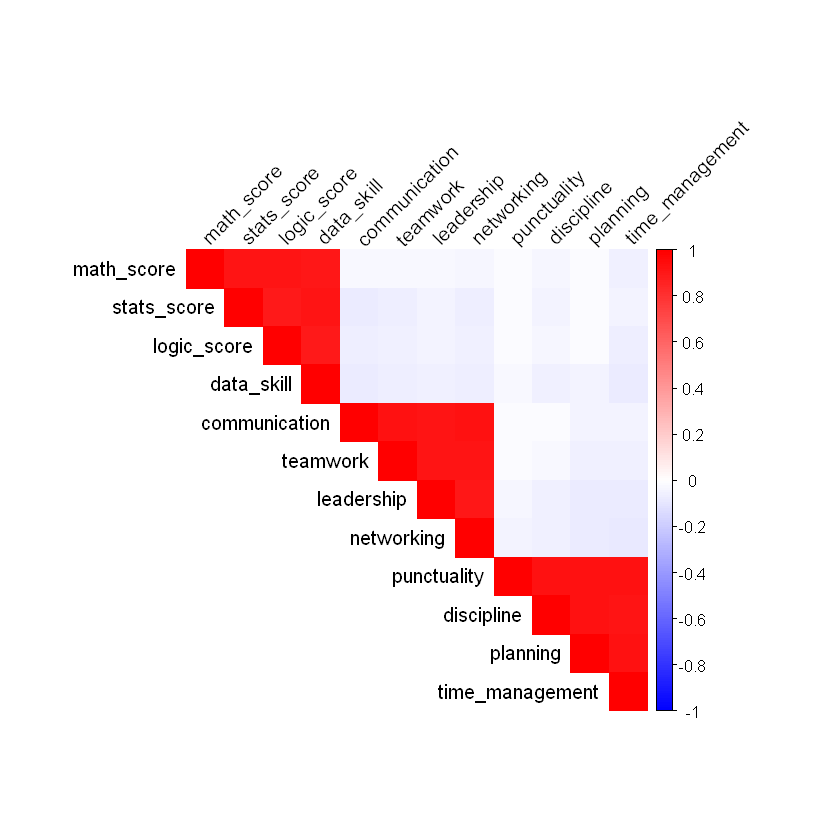

In [8]:
library(corrplot)

cor_matrix <- cor(data)

# Azul = negativa, Blanco = 0, Rojo = positiva (ALTA)
col_scale <- colorRampPalette(c("blue", "white", "red"))(200)

corrplot(
  cor_matrix,
  method = "color",
  type = "upper",
  col = col_scale,
  tl.col = "black",
  tl.srt = 45
)


# Modelo

In [9]:
pca_result <- prcomp(data, scale. = TRUE)

summary(pca_result)


Importance of components:
                          PC1    PC2   PC3    PC4    PC5     PC6     PC7
Standard deviation     1.9926 1.9720 1.840 0.3341 0.3250 0.31578 0.29249
Proportion of Variance 0.3309 0.3241 0.282 0.0093 0.0088 0.00831 0.00713
Cumulative Proportion  0.3309 0.6549 0.937 0.9463 0.9551 0.96337 0.97050
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.28470 0.27182 0.26130 0.25594 0.25545
Proportion of Variance 0.00675 0.00616 0.00569 0.00546 0.00544
Cumulative Proportion  0.97726 0.98341 0.98910 0.99456 1.00000

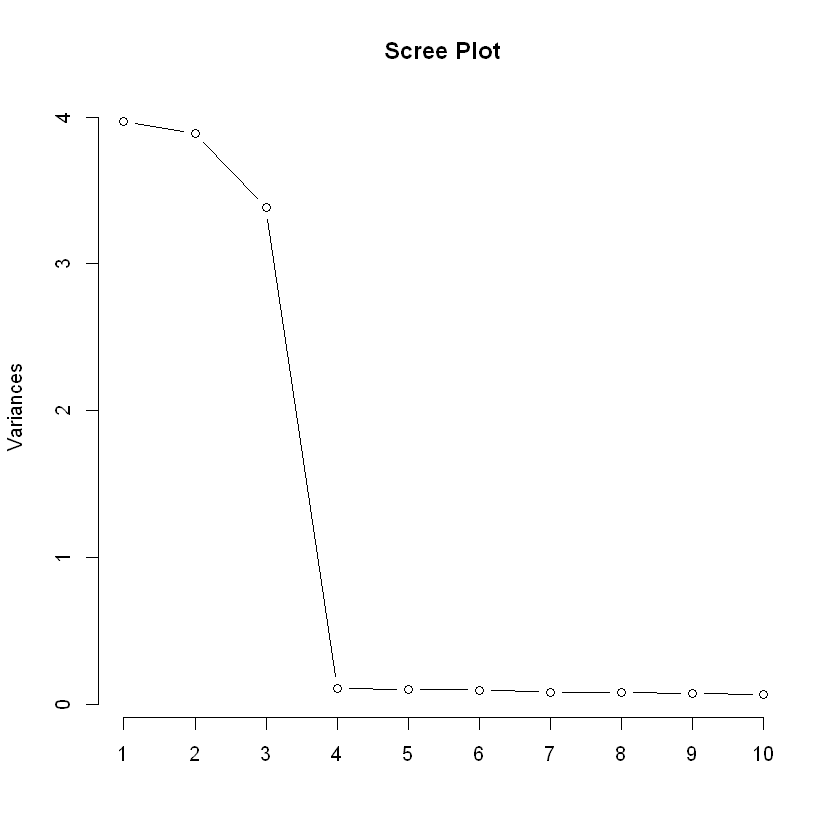

In [10]:
plot(pca_result, type = "l", main = "Scree Plot")



In [11]:
# Loadings (matriz completa)
pca_result$rotation

# Loadings solo para los 3 primeros PCs (lo típico para interpretar)
round(pca_result$rotation[, 1:3], 3)

# (opcional) Ver qué variables “pesan” más en cada PC (top 5 por |loading|)
top5 <- function(k) {
  v <- sort(abs(pca_result$rotation[, k]), decreasing = TRUE)
  head(v, 5)
}
top5(1); top5(2); top5(3)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
math_score,-0.1751250,-0.35572341,0.3089929,0.357194425,0.382914572,-0.05883331,-0.134630701,-0.34560729,0.08179359,0.004655290,-0.177757226,-0.54199944
stats_score,-0.1879209,-0.35825265,0.2943146,-0.429102784,0.389965805,0.15946052,0.055240605,0.32897952,0.35143411,0.270974728,0.191092267,0.20823301
logic_score,-0.1855545,-0.35744634,0.2937428,0.457827202,-0.428651775,0.44191342,0.047672040,0.24521726,-0.24822469,-0.008937811,0.056808735,0.18855896
data_skill,-0.1839679,-0.36438761,0.2862334,-0.383404024,-0.333238398,-0.54673876,0.033353367,-0.21911658,-0.20325154,-0.284688181,-0.042961262,0.14542838
communication,0.3863273,0.06512386,0.3133245,0.294004460,0.240360270,-0.15698952,-0.096028136,-0.37947213,-0.07785997,0.187680267,0.268910771,0.55916090
teamwork,0.3866260,0.05985581,0.3125720,0.003198594,-0.028613813,-0.21689894,-0.574661225,0.54007647,-0.05126095,-0.029113892,-0.254060847,-0.10687329
leadership,0.3898731,0.04773752,0.3058638,-0.381564480,-0.205840683,0.55913427,-0.086132015,-0.36920221,0.15278847,-0.241588983,-0.003283794,-0.16163272
networking,0.3947331,0.04994717,0.3019471,0.066705846,-0.005967428,-0.17979822,0.767682558,0.22473115,-0.03173855,0.052701306,-0.008058910,-0.26460536
punctuality,-0.2504971,0.33780865,0.2732626,-0.177148908,-0.205063656,0.03073876,-0.013647823,-0.16667652,-0.20588273,0.710850809,-0.307011759,-0.06454604
discipline,-0.2492931,0.34583711,0.2609154,0.156251281,-0.317604249,-0.20024599,-0.113509967,0.03486145,0.46322569,-0.033413910,0.559355211,-0.20521883


,PC1,PC2,PC3
math_score,-0.175,-0.356,0.309
stats_score,-0.188,-0.358,0.294
logic_score,-0.186,-0.357,0.294
data_skill,-0.184,-0.364,0.286
communication,0.386,0.065,0.313
teamwork,0.387,0.060,0.313
leadership,0.390,0.048,0.306
networking,0.395,0.050,0.302
punctuality,-0.250,0.338,0.273
discipline,-0.249,0.346,0.261


networking    leadership      teamwork communication      planning 
    0.3947331     0.3898731     0.3866260     0.3863273     0.2633206

data_skill     stats_score     logic_score      math_score time_management 
      0.3643876       0.3582527       0.3574463       0.3557234       0.3513728

communication      teamwork    math_score    leadership    networking 
    0.3133245     0.3125720     0.3089929     0.3058638     0.3019471

🎯 Resumen conceptual elegante para clase

Podemos definir tres dimensiones:

🔹 Dimensión 1: Competencias Sociales

(communication, teamwork, leadership, networking)

🔹 Dimensión 2: Organización y Disciplina

(punctuality, discipline, planning, time_management)

🔹 Dimensión 3: Competencia General Transversal

(combinación equilibrada de todas)

El PCA recuperó casi perfectamente la estructura latente que construimos:

- Bloque social

- Bloque organizacional

- Bloque analítico

## Detalles si hacen falta

### PC1 uno

PC1
Loadings más altos (en valor absoluto):

- communication (~0.39)

- teamwork (~0.39)

- leadership (~0.39)

- networking (~0.40)

También cargan (negativamente, pero menos fuerte):

- punctuality, discipline, planning (~ -0.25)

Interpretación

- PC1 está dominado claramente por las variables sociales.

**Dimensión 1:Habilidad Social / Competencias Interpersonales**

Es un eje que diferencia personas con alta capacidad social vs menor.

### PC2
Loadings más altos:

punctuality (~0.35)

discipline (~0.35)

planning (~0.34)

time_management (~0.35)

Y negativos:

math, stats, logic (~ -0.35)

🔎 Interpretación

Este eje contrapone:

Organización / disciplina
vs

Capacidad analítica

Es un eje más estructural.

📌 Dimensión 2:

Organización y Estructura

Podrías llamarlo también:

“Disciplina vs Perfil Analítico”

### PC3

Aquí todos cargan positivo (~0.25–0.31).

Es más difuso.

Analíticas ~0.30

Sociales ~0.31

Organización ~0.26

🔎 Interpretación 

Este componente parece capturar algo transversal.

**Podría representar:**

Nivel general de desempeño / Competencia global

Es como un “factor general”.

## Biplot

Warning message:
"package 'factoextra' is in use and will not be installed"
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>."


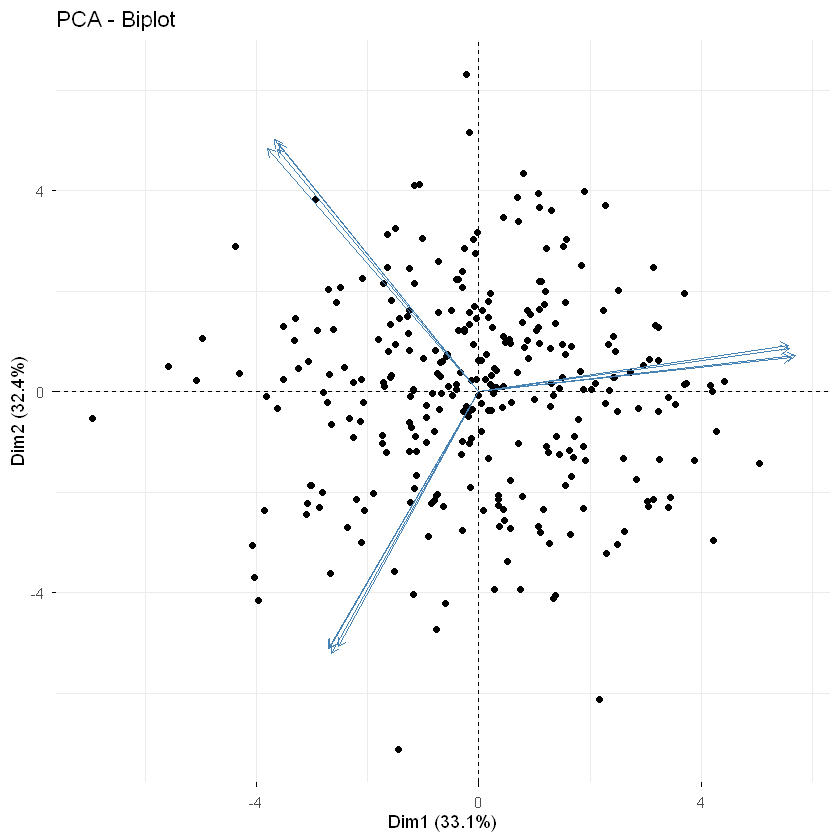

In [12]:
install.packages("factoextra")
library(factoextra)

fviz_pca_biplot(
  pca_result,
  axes = c(1, 2),
  repel = TRUE,        # evita solapamiento de labels
  geom.ind = "point",  # puntos para observaciones
  geom.var = "arrow"   # flechas para variables
) +
  geom_hline(yintercept = 0, linetype = 2) +
  geom_vline(xintercept = 0, linetype = 2)


Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


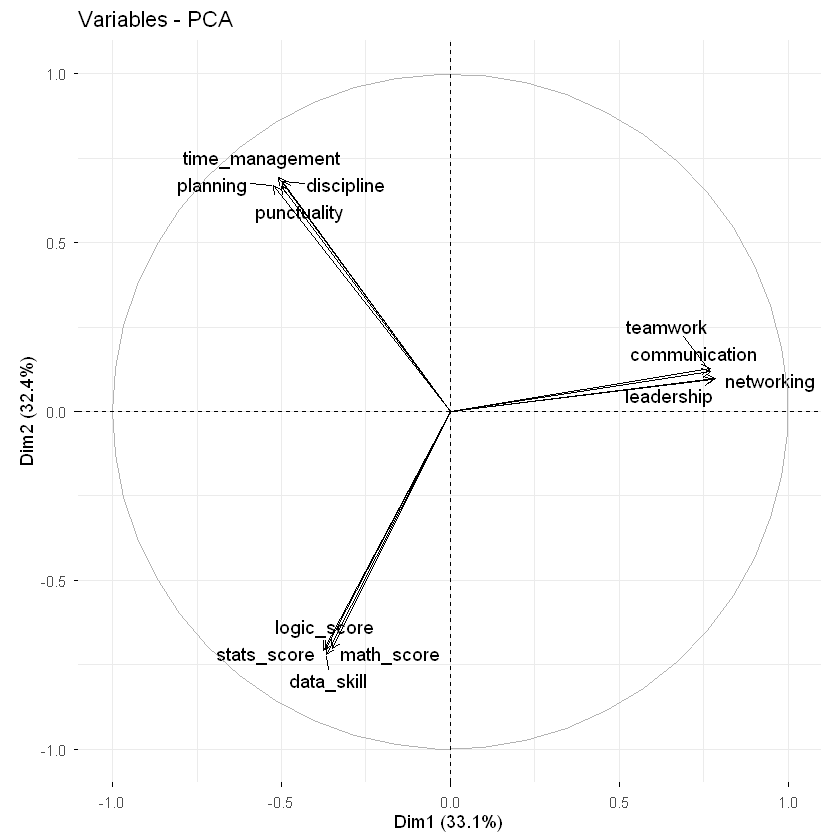

In [13]:
fviz_pca_var(
  pca_result,
  axes = c(1, 2),
  repel = TRUE
) +
  geom_hline(yintercept = 0, linetype = 2) +
  geom_vline(xintercept = 0, linetype = 2)


🔹 BLOQUE 1 — Sociales (derecha)

teamwork

communication

leadership

networking

👉 Todas apuntan en la misma dirección
👉 Muy juntas
👉 Casi paralelas

Interpretación:

✔ Alta correlación entre ellas
✔ Definen una dimensión clara → Competencias sociales

🔹 BLOQUE 2 — Organización (arriba izquierda)

punctuality

discipline

planning

time_management

👉 También muy juntas
👉 Muy alineadas
👉 Separadas del bloque social

Interpretación:

✔ Segunda dimensión clara → Organización / disciplina

🔹 BLOQUE 3 — Analíticas (abajo izquierda)

math_score

stats_score

logic_score

data_skill

👉 Nuevamente agrupadas
👉 Dirección distinta a organización
👉 Separadas del bloque social

Interpretación:

✔ Tercera dimensión → Capacidad analítica

3️⃣ Qué significa el ángulo entre flechas

Regla fundamental:

Ángulo	Significado
0°	Correlación positiva fuerte
90°	Independencia
180°	Correlación negativa

Observaciones:

Sociales vs Analíticas → casi opuestas → ligera correlación negativa

Sociales vs Organización → ángulo grande → baja correlación

Organización vs Analíticas → también diferenciadas

📌 4️⃣ Qué significa que estén cerca del círculo

Mientras más cerca del círculo:

✔ Mejor representada está la variable en PC1–PC2
✔ Mayor calidad de representación (cos² alto)

Tus variables están bastante cerca → excelente estructura.

**Interpretación global elegante (modo clase)**

El PCA revela tres dimensiones latentes bien diferenciadas: una asociada a competencias sociales, otra a organización y disciplina, y una tercera vinculada a habilidades analíticas. La estructura factorial es clara, con alta correlación intra-bloque y baja correlación inter-bloques.

# Scores

In [14]:
scores <- pca_result$x
head(scores)


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
-1.7066431,2.15998393,-1.1581243,-0.047670795,0.3305813,-0.15913012,0.07535263,0.35374769,-0.16472804,0.36694897,0.45070143,-0.04464145
-0.9941383,0.66685193,-1.3761736,0.091456410,-0.3640771,-0.07844697,-0.03426399,-0.22406115,0.13405985,0.55827085,0.03351011,0.01850090
-3.0869222,-2.22103477,0.6665935,-0.007300843,0.5612412,-0.21898429,-0.17715782,-0.04407222,-0.04681202,0.19258889,0.12596255,0.30901573
-0.3031868,-2.75726279,-2.7165921,0.337562759,-0.2228045,-0.18791409,-0.11334370,-0.42967772,0.21528317,-0.05712119,-0.47635494,-0.02528446
-1.1775380,0.05281065,0.7631209,0.338827732,-0.1250340,-0.56715460,0.44717310,0.32279772,0.15759569,-0.18657448,0.26196603,-0.16453590
-0.9054677,-2.88844657,2.4686277,0.052878588,-0.3718582,0.30276156,0.08447978,0.55858724,0.21704118,-0.15831680,0.11766483,0.20693154


## Reemplazar todas las variables por los 3 componentes

In [16]:
data_pca <- as.data.frame(pca_result$x[, 1:3])
str(data_pca)


'data.frame':	300 obs. of  3 variables:
 $ PC1: num  -1.707 -0.994 -3.087 -0.303 -1.178 ...
 $ PC2: num  2.16 0.6669 -2.221 -2.7573 0.0528 ...
 $ PC3: num  -1.158 -1.376 0.667 -2.717 0.763 ...


**Interpretación elegante para clase**

Los scores representan la proyección de cada observación sobre los ejes principales. Matemáticamente, se obtienen multiplicando la matriz de datos estandarizados por la matriz de autovectores.

**¿Cuándo usamos solo los scores?**


| **Caso**                      | **Ejemplo práctico (1 oración)**                                                                                                                                 |
| ----------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 🔹 Reducir dimensionalidad    | “En un dashboard ejecutivo, reducimos 12 métricas de desempeño a 3 componentes principales para visualizar perfiles de empleados de forma más clara.”            |
| 🔹 Eliminar multicolinealidad | “Para predecir salario, reemplazamos variables altamente correlacionadas como math_score y stats_score por PCs ortogonales para evitar coeficientes inestables.” |
| 🔹 Simplificar el modelo      | “En un modelo de promoción interna, usamos solo PC1, PC2 y PC3 en lugar de 12 variables para reducir complejidad y mejorar generalización.”                      |
| 🔹 Hacer clustering           | “Antes de aplicar k-means, proyectamos los datos en los primeros 3 PCs para segmentar empleados según dimensiones latentes y no según variables redundantes.”    |
